In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
import tensorflowjs as tfjs
import os
import pickle
from keras_tuner.tuners import RandomSearch
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
print(tf.config.list_physical_devices('GPU'))

[]


In [8]:
# Constants
BATCH_SIZE = 32
LR = 1e-4

In [9]:
# Load training data
with open('data/matches/diamond.ds', 'rb') as f:
    training_data = pickle.load(f)

In [10]:
# Partition Dataset
train_len = int(training_data[0].shape[0] * 0.9)

train_x = training_data[0][:train_len]
train_y = training_data[1][:train_len]

test_x = training_data[0][train_len:]
test_y = training_data[1][train_len:]

In [11]:
def model_builder(hp):
    model = keras.Sequential()
    for i in range(hp.Int('layers', 4, 12)):
        model.add(layers.Dense(
            units=hp.Int('units_'+str(i), 50, 1000, step=100),
            activation=hp.Choice('act_'+str(i), ['relu', 'elu', 'selu'])))
    model.add(tf.keras.layers.Dense(1))
    
    loss = losses.MeanAbsoluteError()
    optimizer = optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-4]))
    model.compile(loss=loss, optimizer=optimizer)
    return model

In [12]:
tuner = RandomSearch(
    model_builder,
    objective='val_loss',
    max_trials=100,
    executions_per_trial=1,
    directory='checkpoints',
    project_name='winpredictor'
)

In [13]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 1000, 'step': 100, 'sampling': 'linear'}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu', 'selu'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 1000, 'step': 100, 'sampling': 'linear'}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu', 'selu'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.0001], 'ordered': True}


In [14]:
tuner.search(train_x[:10000], train_y[:10000], epochs=5, validation_data=(test_x[:1000], test_y[:1000]))

Trial 11 Complete [00h 00m 31s]
val_loss: 0.18157582879066467

Best val_loss So Far: 0.17647056579589843
Total elapsed time: 00h 05m 06s

Search: Running Trial #12

Value             |Best Value So Far |Hyperparameter
5                 |6                 |layers
950               |850               |units_0
selu              |elu               |act_0
650               |150               |units_1
relu              |selu              |act_1
0.0001            |0.0001            |learning_rate
750               |650               |units_2
selu              |relu              |act_2
850               |850               |units_3
elu               |selu              |act_3
550               |50                |units_4
relu              |relu              |act_4
950               |50                |units_5
elu               |relu              |act_5

Epoch 1/5
313/313 [==============================] - 3s 10ms/step - loss: 0.1981 - val_loss: 0.1951
Epoch 2/5
313/313 [=========================

KeyboardInterrupt: 

In [57]:
history = model.fit(train_x, train_y, batch_size=BATCH_SIZE, validation_split=0.01, epochs=200, verbose=1)

Epoch 1/200
4371/4371 [==============================] - 7s 1ms/step - loss: 0.2172 - val_loss: 0.1748
Epoch 2/200
4371/4371 [==============================] - 6s 1ms/step - loss: 0.1771 - val_loss: 0.1740
Epoch 3/200
4371/4371 [==============================] - 6s 1ms/step - loss: 0.1773 - val_loss: 0.1744
Epoch 4/200
4371/4371 [==============================] - 6s 1ms/step - loss: 0.1765 - val_loss: 0.1749
Epoch 5/200
4371/4371 [==============================] - 6s 1ms/step - loss: 0.1773 - val_loss: 0.1749
Epoch 6/200
4371/4371 [==============================] - 6s 1ms/step - loss: 0.1769 - val_loss: 0.1736
Epoch 7/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.1766 - val_loss: 0.1743
Epoch 8/200
4371/4371 [==============================] - 6s 1ms/step - loss: 0.1765 - val_loss: 0.1733
Epoch 9/200
4371/4371 [==============================] - 6s 1ms/step - loss: 0.1763 - val_loss: 0.1750
Epoch 10/200
4371/4371 [==============================] - 6s 1ms/step - l

Epoch 80/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.1771 - val_loss: 0.1734
Epoch 81/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.1767 - val_loss: 0.1732
Epoch 82/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.1773 - val_loss: 0.1737
Epoch 83/200
4371/4371 [==============================] - 6s 1ms/step - loss: 0.1774 - val_loss: 0.1732
Epoch 84/200
4371/4371 [==============================] - 6s 1ms/step - loss: 0.1766 - val_loss: 0.1804
Epoch 85/200
4371/4371 [==============================] - 6s 1ms/step - loss: 0.1782 - val_loss: 0.1749
Epoch 86/200
4371/4371 [==============================] - 6s 1ms/step - loss: 0.1766 - val_loss: 0.1732
Epoch 87/200
4371/4371 [==============================] - 6s 1ms/step - loss: 0.1766 - val_loss: 0.1733
Epoch 88/200
4371/4371 [==============================] - 6s 1ms/step - loss: 0.1766 - val_loss: 0.1732
Epoch 89/200
4371/4371 [==============================] - 6s 1ms

In [51]:
history_dict = history.history

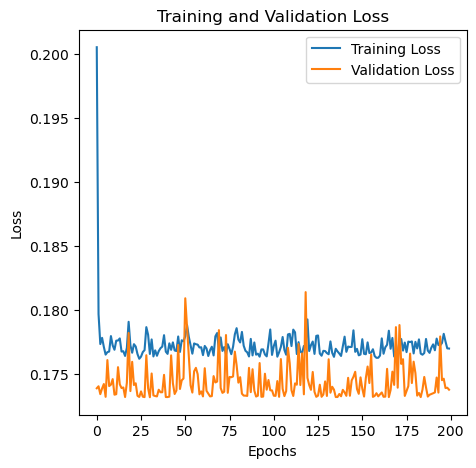

In [54]:
plt.figure(figsize=(5, 5))
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
loss = model.evaluate(test_x, test_y)
print('Loss:', loss)

491/491 [==============================] - 0s 755us/step - loss: 0.1728
Loss: 0.17277731001377106


In [27]:
data = tf.random.uniform([1024, 4])
ds = tf.data.Dataset.from_tensor_slices(data)
ds = ds.batch(32)
ds1 = ds.take(16)
ds2 = ds.skip(16).take(16)

In [ ]:
data = tf.random.uniform([1024, 4])
ds = tf.data.Dataset.from_tensor_slices(data)
ds1 = ds.take(512).batch(32)
ds2 = ds.skip(512).take(512).batch(32)

In [47]:
# Save the model
export_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Activation('sigmoid')
])

In [59]:
game = 'Aatrox,Nidalee,Velkoz,Jhin,Nautilus,Darius,Nocturne,Zoe,Draven,Shaco,true'
vec = process_match(game)[:-1]
out = export_model.predict([vec])
if out > 0.5:
    print('Win')
else:
    print('Loss')

1/1 [==============================] - 0s 18ms/step
Win


In [36]:
tfjs.converters.save_keras_model(export_model, 'winpredictor/public/models/master')